In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from itertools import product
from tqdm import tqdm

[Ссылка на репозиторий с датасетом](https://github.com/itmo-ml-lab-ML-course/parser-aslantemirkanov)

In [2]:
import sys
print(sys.prefix)

C:\Users\Aslan\AppData\Local\Programs\Python\Python310


In [744]:
dataset = './flat_dataset.csv'
data = pd.read_csv(dataset)
data.head()

,цена,название,адрес,количество комнат,площадь,жилая площадь,этаж,метро,ремонт,год постройки,материалы,отопление,высота потолков,лифт,описание
0,3100000,"Продажа 1-комнатной квартиры 10,7 м², 2/4 этаж","Санкт-Петербург, Василеостровский район, 10-я ...",1.0,10.7,8.0,2,Василеостровская,NaN,NaN,кирпич,NaN,3.00,0,Студия в коммунальной квартире после капитальн...
1,66499000,"Продажа 1-комнатной квартиры 122,9 м², 2/6 этаж","Санкт-Петербург, Центральный район, улица Руби...",1.0,122.9,24.5,2,Достоевская,NaN,NaN,кирпич,центральное,3.40,0,Доходный дом графа М. П. Толстого (Толсто́вски...
2,4500000,"Продажа 1-комнатной квартиры 16,6 м², 3/12 этаж","Санкт-Петербург, Выборгский район, Большой Сам...",1.0,16.6,11.0,3,Лесная,NaN,2020.0,кирпич-монолит,NaN,2.64,1,ВЫГОДНОЕ ПРЕДЛОЖЕНИЕ ДЛЯ ПАССИВНОГО ДОХОДА!\nК...
3,4200000,"Продажа 1-комнатной квартиры 16,9 м², 2/6 этаж","Санкт-Петербург, Центральный район, улица Руби...",1.0,16.9,14.8,2,Достоевская,Черновая отделка,NaN,кирпич,центральное,2.64,1,"Продается квартира-студия №8 площадью 14,82 м2..."
4,5610000,"Продажа 1-комнатной квартиры 18,7 м², 1/5 этаж","Санкт-Петербург, Центральный район, Греческий ...",1.0,18.7,16.3,1,Площадь Восстания,Дизайнерский,NaN,кирпич,NaN,2.80,0,Продается 1ккв № 8 площадью 18.7м2 (С ИНДИВИДУ...


Целевой признак - цена.
Текстовые данные "название", "адрес", "описание" нам не нужны. Эквивалентом адреса будет метро, т.к. сложно исследовать зависимость цены от адреса, ввиду отсутствия такового понимания. Метро является большим обобщением, по сути, как район.    

In [745]:
data.drop(['название', 'адрес', 'описание'], axis=1, inplace=True)

In [746]:
data

,цена,количество комнат,площадь,жилая площадь,этаж,метро,ремонт,год постройки,материалы,отопление,высота потолков,лифт
0,3100000,1.0,10.7,8.0,2,Василеостровская,NaN,NaN,кирпич,NaN,3.00,0
1,66499000,1.0,122.9,24.5,2,Достоевская,NaN,NaN,кирпич,центральное,3.40,0
2,4500000,1.0,16.6,11.0,3,Лесная,NaN,2020.0,кирпич-монолит,NaN,2.64,1
3,4200000,1.0,16.9,14.8,2,Достоевская,Черновая отделка,NaN,кирпич,центральное,2.64,1
4,5610000,1.0,18.7,16.3,1,Площадь Восстания,Дизайнерский,NaN,кирпич,NaN,2.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8530,11300000,5.0,71.2,54.1,5,Международная,Нужен ремонт,NaN,панель,центральное,2.50,1
8531,11199000,5.0,71.5,54.5,5,Международная,Хороший,NaN,NaN,центральное,NaN,1
8532,21000000,6.0,82.5,60.0,1,Театральная (2024),NaN,NaN,кирпич,центральное,2.64,1
8533,20850000,5.0,95.7,60.0,4,Спасская,NaN,NaN,кирпич,центральное,3.20,0


In [747]:
data.describe()

,цена,количество комнат,площадь,жилая площадь,этаж,год постройки,высота потолков,лифт
count,8.535000e+03,7112.000000,8535.000000,7849.000000,8535.000000,2550.000000,6837.000000,8535.000000
mean,1.061081e+07,1.953740,49.965823,28.926258,6.451904,2018.705098,2.771267,0.707323
std,1.066197e+07,0.965862,27.206002,17.235919,5.268489,8.041434,0.834152,0.455018
min,1.750000e+06,1.000000,6.500000,1.000000,-2.000000,1837.000000,1.650000,0.000000
25%,6.800000e+06,1.000000,33.500000,17.300000,3.000000,2017.000000,2.580000,0.000000
50%,8.790000e+06,2.000000,44.500000,26.700000,5.000000,2020.000000,2.700000,1.000000
75%,1.118500e+07,3.000000,58.900000,35.700000,9.000000,2022.000000,2.800000,1.000000
max,4.500000e+08,12.000000,495.000000,342.000000,32.000000,2023.000000,34.000000,1.000000


Описательная статистика дает нам первичное представление о данных:
Средняя цена составляет примерно 10.6 млн, но стандартное отклонение довольно велико, что указывает на широкий разброс цен.
Средняя площадь квартир в выборке составляет около 50 кв.м.
Средняя жилая площадь составляет примерно 29 кв.м., но этих данных на 1000 меньше, чем значений общей площади. Отсутствующие данные заполним в среднем отношении общей и жилой площади.
Средний год постройки объектов недвижимости, где он указан, — около 2019 года, что может указывать на большое количество новостроек в датасете, однако этих данных мало, поэтому брать их в расчет не стоит. Дисперсия маленькая, мало данных о квартирах в старых домах.
Высота потолков в среднем около 2.77 м, что выше стандартного значения в 2.5 м. Кажется, что этот фактор особо не влияет на цену, т.к. во всех новостройках квартиры примерно одинаковой высоты, причем в этих данных присутствует большое количество выбросов - потолков по 34 метра, очевидно, в квартирах не бывает.

Еще известно, что в датасете существует информация о квартирах - студиях. В таких данных в столбце "количество комнат" нет данных. Будем заполнять эти данные нулем.

In [748]:
unique_values = data['ремонт'].value_counts(dropna=False)
unique_values

ремонт
NaN                 3322
Хороший             1686
Евро                1327
Нужен ремонт         772
Черновая отделка     651
Дизайнерский         631
Чистовая отделка     146
Name: count, dtype: int64

Во многих данных не указана информация о ремонте. Кажется, что это важный фактор, удалять его сомнительная идея. Я пробовал проводить one-hot преобразования, но у нас слишком большой дисбаланс классов. Квартир, у которых неопределенный ремонт, слишком много. Я просмотрел несколько сотен таких объявлений, никакой закономерности между другими столбцами я не видел, чтобы как-то по ним можно было предсказать пропущенные значения, это и видно было в таблице корреляции, отсутствие ремонта слабо коррелирует с остальными признаками (около 0.08). Дальше я пробовал провести бинаризацию следующим образом: "1" будет обозначать, что квартира в хорошем состоянии или лучше (например, "Евро", "Хороший", "Дизайнерский", "Чистовая отделка"), и "0" будет обозначать, что квартире нужен ремонт или состояние ремонта неизвестно. Однако это тоже особо результата не принесло. К сожалению, датасет содержит плохие данные о ремонте, приходится удалить этот признак.  

In [749]:
data.drop(['ремонт', 'год постройки', 'высота потолков'], axis=1, inplace=True)

In [750]:
unique_values = data['материалы'].value_counts(dropna=False)
unique_values

материалы
кирпич            2569
панель            1957
монолит           1541
кирпич-монолит    1529
NaN                784
блок               151
дерево               4
Name: count, dtype: int64

Сделаем one-hot преобразование для материалов ремонта квартиры, отсутствие данных будет интерпретироваться, как отдельный материал, их относительно немного, поэтому не сильно страшно. 

In [751]:
repair_one_hot = pd.get_dummies(data['материалы'], prefix='материал').astype(int)
data = pd.concat([data, repair_one_hot], axis=1)
data.head()

,цена,количество комнат,площадь,жилая площадь,этаж,метро,материалы,отопление,лифт,материал_блок,материал_дерево,материал_кирпич,материал_кирпич-монолит,материал_монолит,материал_панель
0,3100000,1.0,10.7,8.0,2,Василеостровская,кирпич,NaN,0,0,0,1,0,0,0
1,66499000,1.0,122.9,24.5,2,Достоевская,кирпич,центральное,0,0,0,1,0,0,0
2,4500000,1.0,16.6,11.0,3,Лесная,кирпич-монолит,NaN,1,0,0,0,1,0,0
3,4200000,1.0,16.9,14.8,2,Достоевская,кирпич,центральное,1,0,0,1,0,0,0
4,5610000,1.0,18.7,16.3,1,Площадь Восстания,кирпич,NaN,0,0,0,1,0,0,0


In [753]:
unique_values = data['отопление'].value_counts(dropna=False)
unique_values

отопление
центральное          4779
NaN                  3695
домовая котельная      61
Name: count, dtype: int64

Отопление вообще ничего не решает, тем более очень много данных отсутствует, непонятно существуют ли другие виды отопления...

In [754]:
data.drop(['отопление'], axis=1, inplace=True)

In [755]:
# обрабатываем случай с квартирами - студиями
data['количество комнат'] = data['количество комнат'].replace({np.nan: 0})

In [756]:
# обрабатываем случай с отсутствием данных о жилой площади
average_relation = (data['жилая площадь'] / data['площадь']).mean()
data['жилая площадь'] = data.apply(
    lambda row: row['площадь'] * average_relation if pd.isnull(row['жилая площадь']) else row['жилая площадь'],
    axis=1
)

В данных произошли некоторые выбросы, в которых этаж парсился отрицательно (неверное было указано на сайте). Такие данные мы будем брать по модулю

In [757]:
data['этаж'] = data['этаж'].abs()

Дальше проведем анализ зависимостей наших признаков

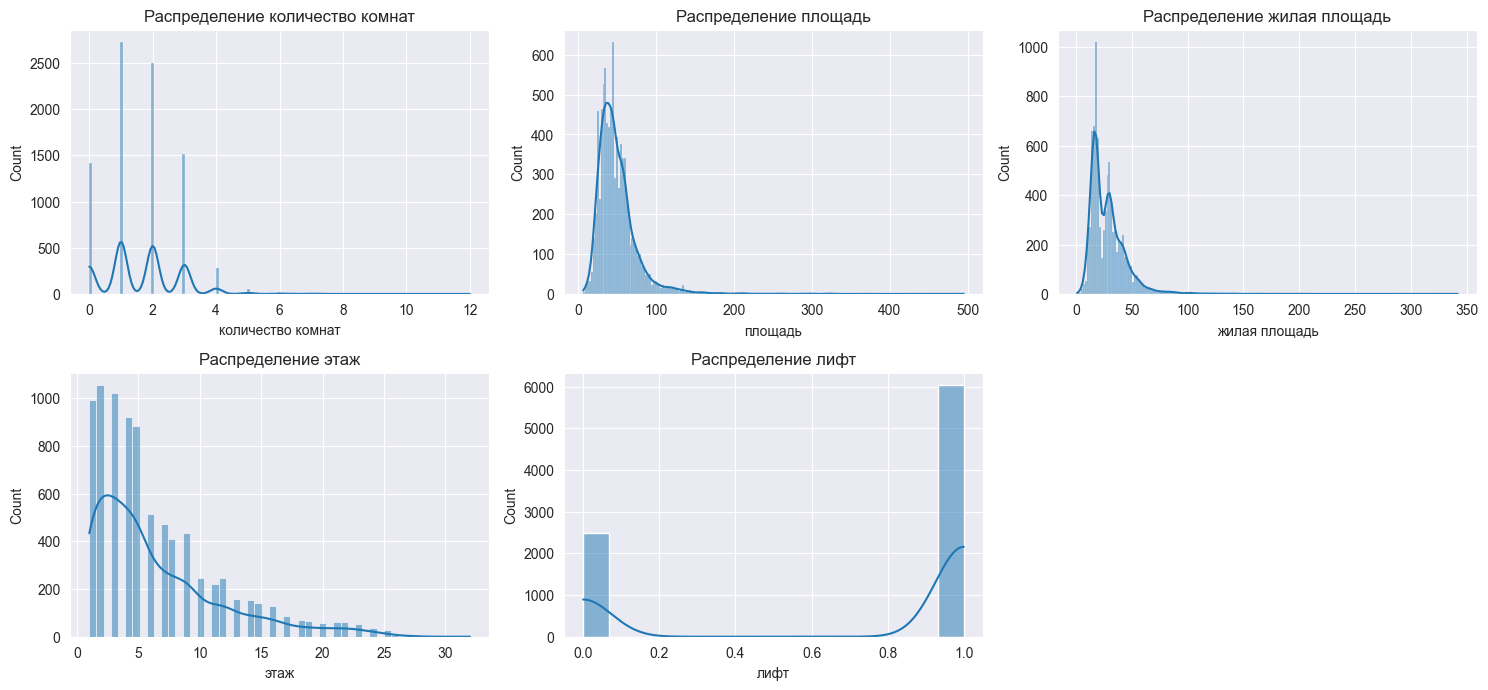

In [758]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.drop('цена')

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Распределение {col}')

plt.tight_layout()
plt.show()

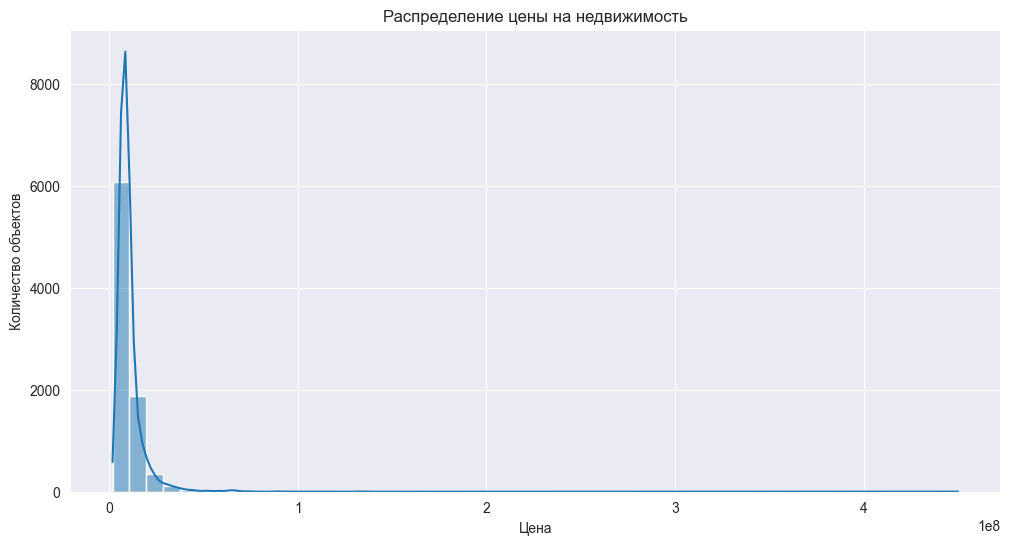

In [759]:
plt.figure(figsize=(12, 6))
sns.histplot(data['цена'], bins=50, kde=True)
plt.title('Распределение цены на недвижимость')
plt.xlabel('Цена')
plt.ylabel('Количество объектов')
plt.show()

Распределение цены показывает, что данные скошены вправо, с большим количеством недорогих квартир и несколькими очень дорогими. Логарифмирование цены - наш выбор. 

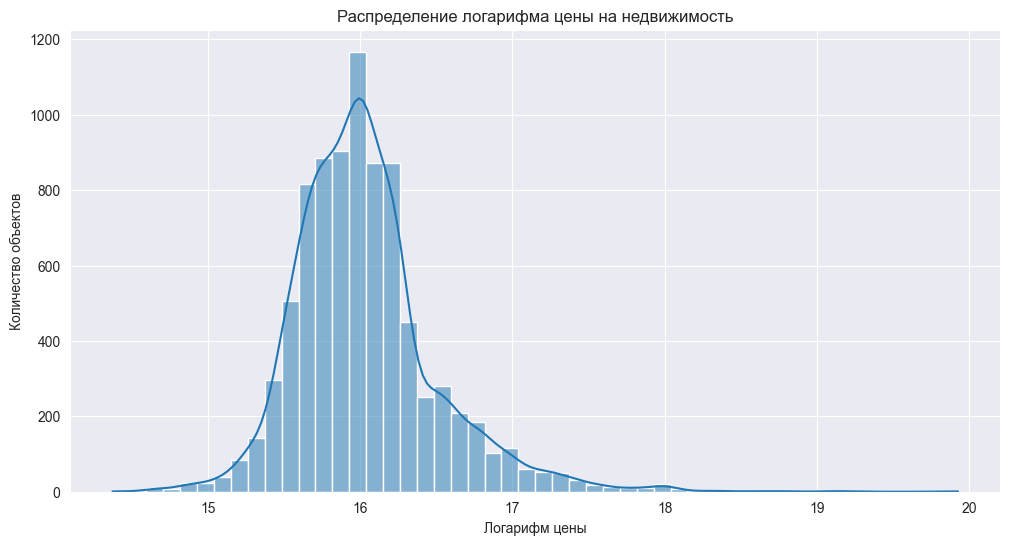

In [760]:
data['логарифм цены'] = np.log1p(data['цена'])

plt.figure(figsize=(12, 6))
sns.histplot(data['логарифм цены'], bins=50, kde=True)
plt.title('Распределение логарифма цены на недвижимость')
plt.xlabel('Логарифм цены')
plt.ylabel('Количество объектов')
plt.show()

Распределение похоже на нормальное, что понятно. У нас не очень много дешевых квартир, как и дорогих. На дорогие маленький спрос, на дешевые маленькое предложение. В основном квартиры средней цены. Но и есть очень дорогие квартиры.

Дальше будем предсказывать логарифм цены, поэтому свойство "цена" удалим.

In [761]:
data.drop(['цена'], axis=1, inplace=True)

Посмотрим на матрицу корреляции числовых признаков:

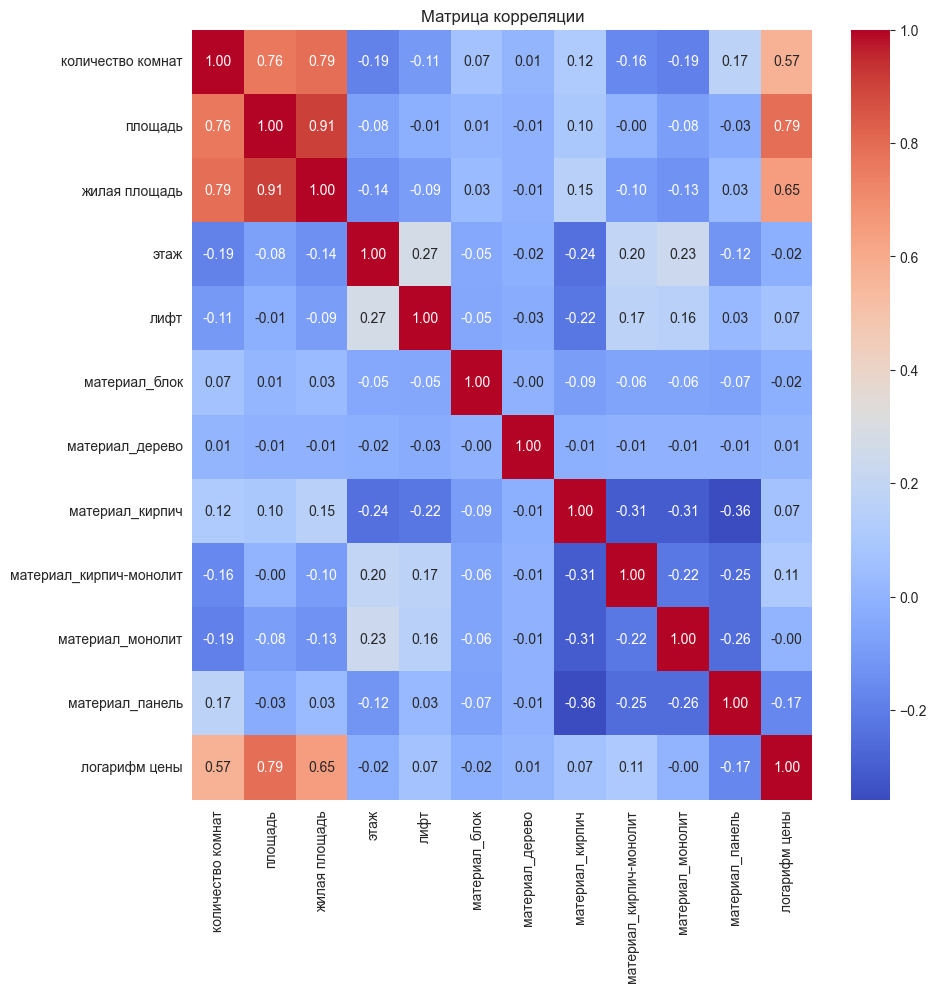

In [763]:
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Матрица корреляции')
plt.show()

Из корреляционной матрицы мы видим, что:
Логарифм цены имеет наибольшую прямую корреляцию с площадью квартиры и жилой площадью, что ожидаемо. Количество комнат также положительно коррелирует с ценой, но в меньшей степени. Наличие лифта имеет незначительную положительную корреляцию с ценой. 
Еще видно, что жилая и общая площадь хорошо коррелирует с количеством комнат, что тоже, в принципе, ожидаемо.

Давайте дальше посмотрим на распределение средней цены по станциям метро:

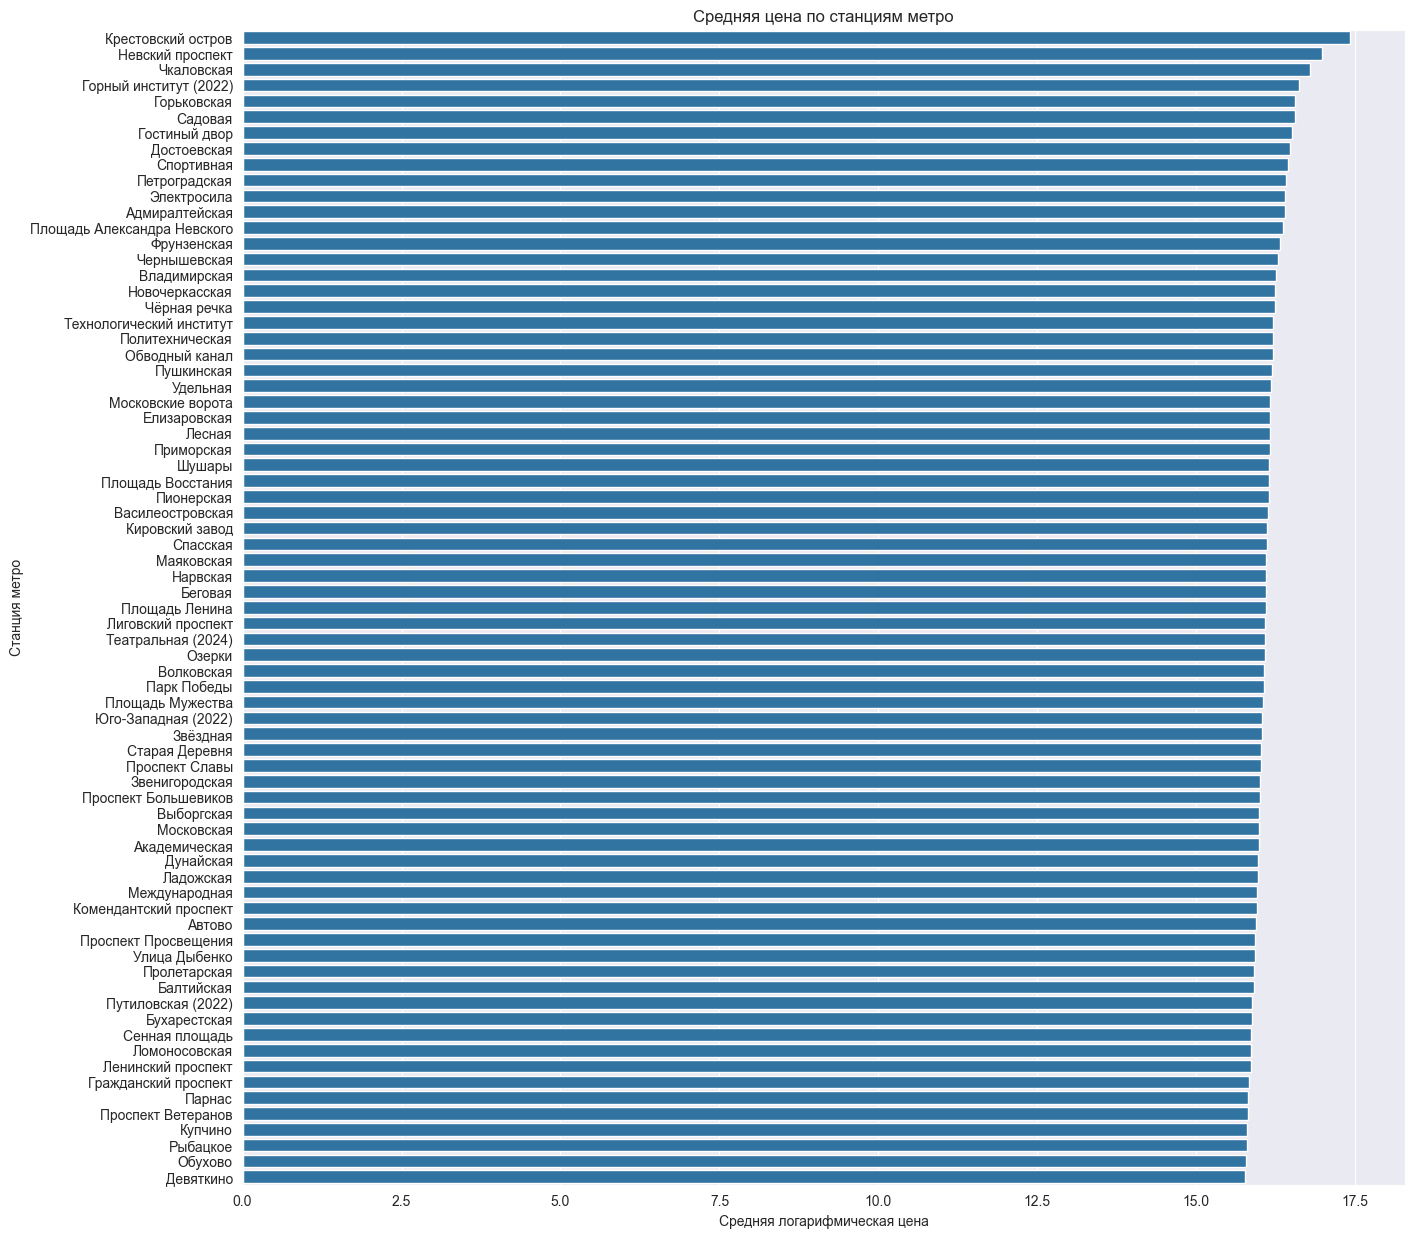

In [765]:
metro_price_median = data.groupby('метро')['логарифм цены'].mean().sort_values(ascending=False)
metro_price_median_df = metro_price_median.reset_index()

plt.figure(figsize=(15, 15))
sns.barplot(x='логарифм цены', y='метро', data=metro_price_median_df)
plt.title('Средняя цена по станциям метро')
plt.xlabel('Средняя логарифмическая цена')
plt.ylabel('Станция метро')
plt.show()

Видим ожидаемый график. На станциях метро, находящиеся в центре и в элитных районах средние цены квартир большие, а на окраинах меньше.

Попробуем создать новые признаки из существующих.

Создаем новое свойство, показывающее количество квадратных метров, которое в среднем приходится на одну комнату

In [769]:
data['квадратов_на_комнату'] = data.apply(
    lambda row: 
    row['площадь'] / 1 if row['количество комнат'] == 0 
    else row['площадь'] / row['количество комнат'], axis=1
)

Сделаем label-encoding для "метро"

In [770]:
label_encoder = LabelEncoder()
data['метро_encoded'] = label_encoder.fit_transform(data['метро'])

In [771]:
data.drop(['метро', 'материалы'], axis=1, inplace=True)

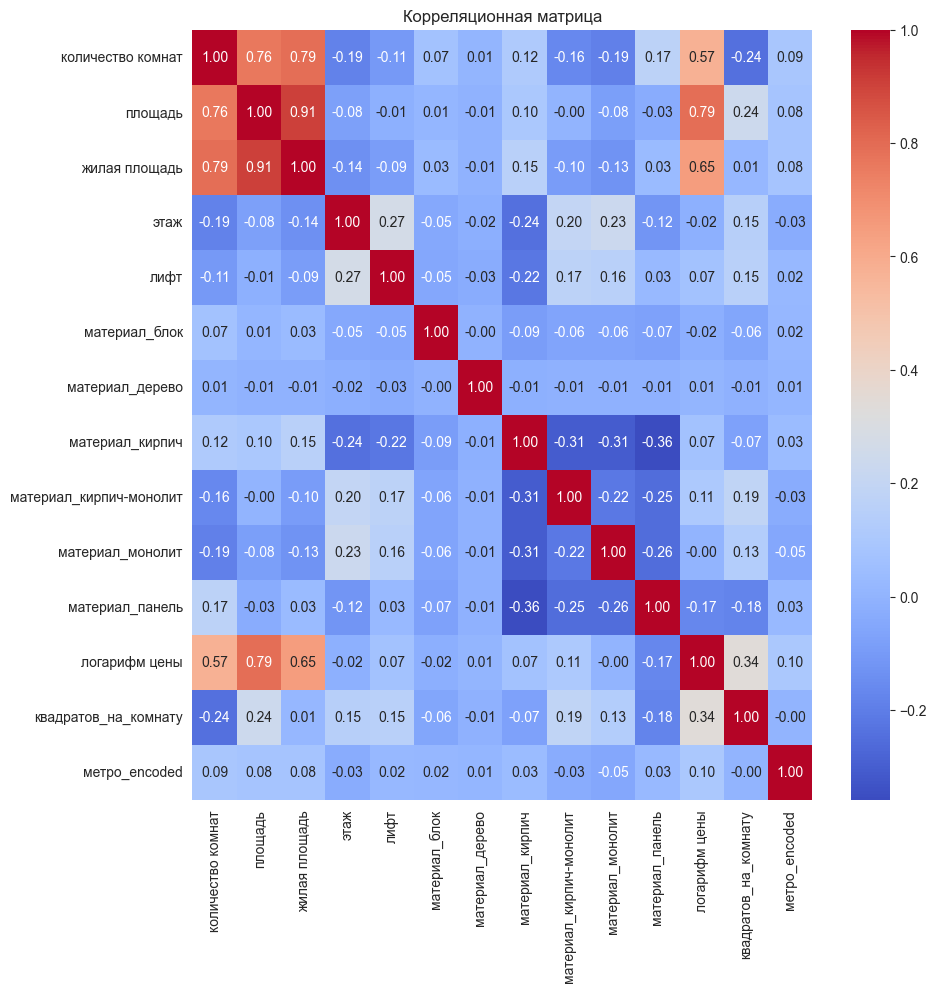

In [772]:
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Корреляционная матрица')
plt.show()

Новый признак "квадратов на комнату" показывает корреляцию около 0.34, не сильно много, но сложно придумать что-то, что будет сильно коррелировать с помощью имеющихся фич. Довольствуюсь тем, что есть(
Зато почти все признаки имеют положительную корреляцию с логарифмом цены.

Далее будем проводить предсказания

Для начала разделим данные на train, val, test части.

In [774]:
# Отделение целевой переменной от признаков
X = data.drop('логарифм цены', axis=1)
y = data['логарифм цены']

In [775]:
# Разделение данных на train, val, test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [776]:
# Нормализация числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [777]:
# Размеры наборов данных
(X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape, y_train.shape, y_val.shape, y_test.shape)

((5974, 13), (1280, 13), (1281, 13), (5974,), (1280,), (1281,))

In [816]:
# Список комбинаций гиперпараметров для перебора

regularizations = [0, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
learning_rates = [0.001, 0.002, 0.01, 0.05, 0.09]
iterations = [1000, 10000]

parameters = product(regularizations, learning_rates, iterations)
parameters_list = list(parameters)
len(parameters_list)

140

## Ridge

Ridge модель - представляет собой версию классического уравнения регрессии с корректирующей функцией: $$\mathcal L(a) = \sum_i (y_i - \hat y_a(x_i)) ^ 2 + \tau \sum_j a_j^2 = \left \| y - Xa \right \|^2 + \tau \left \| a \right \|^2$$

$\tau$ - гиперпараметр, который контролирует силу регуляризации.
Для оптимизации функции потерь и нахождения оптимальных значений весов используется метод градиентного спуска.  

$$a = a - \lambda \cdot grad(\mathcal L(a))$$

$\lambda$ - гиперпараметр скорости обучения.
Формула для подсчета градиента представлены в ручной реализации модели. Весь процесс построения модели состоит из следующих шагов: задаем гиперпараметры $\tau$ и $\lambda$. Определяем изначальное значение функции потерь. Делаем шаг по антиградиенту (т.к. нам нужно ее минимизировать). Пересчитываем функцию потерь. Двигаемся так, пока не достигнем необходимой точности.  

# Модель sklearn.linear_model.Ridge 

In [786]:
def find_best_hyperparameters(train_X, train_y, val_X, val_y, parameters_list):
    best_params = None
    best_mse = float('inf')
    
    for param in tqdm(parameters_list):
        train_model = Ridge(alpha=param[0], max_iter=param[2], tol=1e-5)
        train_model.fit(train_X, train_y)

        val_predictions = train_model.predict(val_X)
        mse_val = mean_squared_error(val_y, val_predictions)

        if mse_val < best_mse:
            best_mse = mse_val
            best_params = param

    return best_params, best_mse

In [787]:
best_params_lib, best_mse_lib = find_best_hyperparameters(X_train_scaled, y_train, X_val_scaled, y_val, parameters_list)
(best_params_lib, best_mse_lib)

100%|██████████| 140/140 [00:00<00:00, 456.75it/s]


((1.0, 0.001, 1000), 0.06392000086352348)

In [788]:
# Обучение и тестирование на лучших гиперпараметрах библиотечной модели
best_lib_model = Ridge(alpha=best_params_lib[0], max_iter=best_params_lib[2], tol=1e-5)
best_lib_model.fit(X_train_scaled, y_train)
y_pred_ridge = best_lib_model.predict(X_test_scaled)

# Собственная реализация Ridge

In [809]:
class MyRidgeRegression:
    def __init__(self, alpha=1.0, learning_rate=0.01, n_iterations=1000):
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.b = 0

        # Градиентный спуск
        for iteration in range(self.n_iterations):

            y_pred = np.dot(X, self.weights) + self.b

            # Расчет градиентов
            dw = (1/n_samples) * (2 * np.dot(X.T, (y_pred - y)) + 2 * self.alpha * self.weights)
            # Свободный член
            db = (1/n_samples) * 2 * np.sum(y_pred - y)

            # Обновление параметров ("весов")
            self.weights -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.b

In [792]:
# Перебор гиперпараметров
def my_best_parameters(train_X, train_y, val_X, val_y, parameters_list):

    best_params = None
    best_mse = float('inf')

    for param in tqdm(parameters_list):
        train_model = MyRidgeRegression(alpha=param[0], learning_rate=param[1], n_iterations=param[2])
        train_model.fit(train_X, train_y)
    
        val_predictions = train_model.predict(val_X)
        mse_val = mean_squared_error(val_y, val_predictions)
    
        if mse_val < best_mse:
            best_mse = mse_val
            best_params = param
        
    return best_params, best_mse

In [793]:
my_best_params, my_best_mse = my_best_parameters(X_train_scaled, y_train, X_val_scaled, y_val, parameters_list)
my_best_params, my_best_mse

100%|██████████| 140/140 [04:35<00:00,  1.96s/it]


((0, 0.002, 10000), 0.06390758083753637)

In [794]:
# Обучение и тестирование на лучших гиперпараметрах собственной модели
my_ridge_model = MyRidgeRegression(my_best_params[0],my_best_params[1],my_best_params[2])
my_ridge_model.fit(X_train_scaled, y_train)
y_pred_my_ridge = my_ridge_model.predict(X_test_scaled)

# Бейзлайн модель

In [811]:
# бейзлайном будет медиана по цене
baseline = np.full_like(y_test, y_train.median())

# Метрики

## MAE

In [812]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae_my_ridge = mean_absolute_error(y_test, y_pred_my_ridge)
mae_baseline = mean_absolute_error(y_test, baseline)
mae_between = mean_absolute_error(y_pred_ridge, y_pred_my_ridge)
print("baseline MAE: ", mae_baseline)
print("lib MAE:      ", mae_ridge)
print("my MAE:       ", mae_my_ridge)
print("between MAE:  ", mae_between)

baseline MAE:  0.3223703413323658
lib MAE:       0.1936745782755215
my MAE:        0.19378831008287198
between MAE:   0.004374411086881812


## MSE

In [813]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_my_ridge = mean_squared_error(y_test, y_pred_my_ridge)
mse_baseline = mean_squared_error(y_test, baseline)
mse_between = mean_squared_error(y_pred_ridge, y_pred_my_ridge)
print("baseline MSE: ", mse_baseline)
print("lib MSE:      ", mse_ridge)
print("my MSE:       ", mse_my_ridge)
print("between MSE:  ", mse_between)

baseline MSE:  0.20140889917629762
lib MSE:       0.06948097819538018
my MSE:        0.0694523947948978
between MSE:   4.491825618849044e-05


Покажем, что модел не переобучена. Сравним метрику MSE на val и test наборах. Если результаты на тестовом наборе сопоставимы с результатами на валидационном наборe, это хороший признак того, что переобучения не произошло.

In [814]:
print("lib test MSE: ", mse_ridge)
print("lib val MSE ", best_mse_lib, "\n")
print("my test MSE: ", mse_my_ridge)
print("my val MSE: ", my_best_mse)

lib test MSE:  0.06948097819538018
lib val MSE  0.06392000086352348 

my test MSE:  0.0694523947948978
my val MSE:  0.06390758083753637


Видно, что модель не переобучена.

## MAPE

In [815]:
mape_ridge = mean_absolute_percentage_error(y_test,y_pred_ridge)
mape_my_ridge = mean_absolute_percentage_error(y_test, y_pred_my_ridge)
mape_baseline = mean_absolute_percentage_error(y_test, baseline)
mape_between = mean_absolute_percentage_error(y_pred_ridge, y_pred_my_ridge)
print("baseline MAPE: ", mape_baseline)
print("lib MAPE:      ", mape_ridge)
print("my MAPE:       ", mape_my_ridge)
print("between MAPE:  ", mape_between)

baseline MAPE:  0.019965938998829102
lib MAPE:       0.012035698521703931
my MAPE:        0.012042076957317424
between MAPE:   0.0002709728588387293


В результате получаем, что собственная и библиотечная реализации оказались почти одинаковыми, это видно по метрике "between MAPE", разница между моделями порядка 0,02 процентов.